# Aaron, SVM

In [1]:
from perform_kickstarer_eda import *

ks_data shape: (20632, 68)
Categorical columns: ['country', 'currency', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'category', 'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday', 'launch_to_deadline', 'launch_to_state_change']
Converted boolean column: staff_pick
Dropped 'state_changed_at_weekday' column
Dropping original column: category
Encoded column: category → 25 features
Dropping original column: deadline_weekday
Encoded column: deadline_weekday → 7 features
Dropping original column: created_at_weekday
Encoded column: created_at_weekday → 7 features
Dropping original column: launched_at_weekday
Encoded column: launched_at_weekday → 7 features
Total categorical columns after encoding: 54


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd


X = kickstarter.copy()
Y1 = kickstarter['SuccessfulBool']
X = X.drop(columns=['SuccessfulBool'])

print("X shape: ", X.shape)
print("Y1 shape: ", Y1.shape)

X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.2, random_state=42)


X shape:  (20627, 66)
Y1 shape:  (20627,)


SVC_RBF: 0.9284891434025291 (0.00732342494176012)
SVC_POLY: 0.9258222931923721 (0.006893696739990794)


/tmp/ipykernel_35702/2816383701.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names)


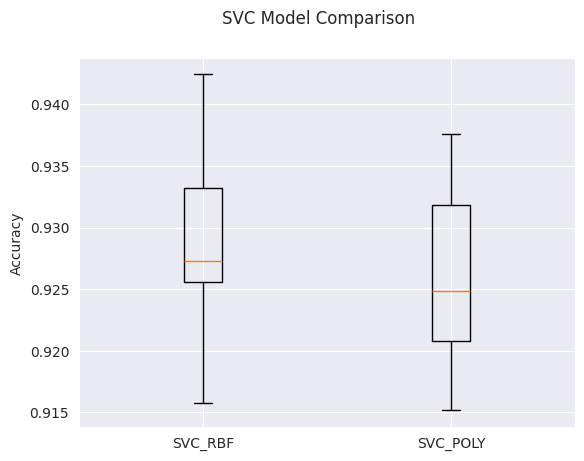

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from matplotlib import pyplot

def evaluate_svc_models(models, X, y):
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True, random_state=42)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print(f"{name}: {cv_results.mean()} ({cv_results.std()})")
    fig = pyplot.figure()
    fig.suptitle('SVC Model Comparison')
    ax = fig.add_subplot(111)
    pyplot.boxplot(results, tick_labels=names)
    ax.set_ylabel('Accuracy')
    pyplot.show()


models = []

svc_rbf_model = SVC(kernel='rbf', C=1.0, random_state=42)
svc_poly_model = SVC(kernel='poly', degree=2, C=1.0, random_state=42)

models.append(('SVC_RBF', svc_rbf_model))
models.append(('SVC_POLY', svc_poly_model))
evaluate_svc_models(models, X_train, y_train)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from matplotlib import pyplot as plt

def evaluate_svc_models(models, X, y):
    results = []
    names = []
    for name, _ in models:
        print(f"Tuning hyperparameters for: {name}")
        kfold = KFold(n_splits=10, shuffle=True, random_state=42)

        if name == 'SVC_RBF':
            param_grid = {
                'C': [0.1, 1, 10],
                'gamma': ['scale', 'auto', 0.01, 0.1]
            }
            model = SVC(kernel='rbf', random_state=42)

        elif name == 'SVC_POLY':
            param_grid = {
                'C': [0.1, 1, 10],
                'degree': [2, 3, 4],
                'gamma': ['scale', 'auto']
            }
            model = SVC(kernel='poly', random_state=42)

        elif name == 'SVC_LINEAR':
            param_grid = {
                'C': [0.1, 1, 10],
                'tol': [1e-4, 1e-3]
            }
            model = SVC(kernel='linear', random_state=42)

        elif name == 'SVC_SIGMOID':
            param_grid = {
                'C': [0.1, 1, 10],
                'gamma': ['scale', 'auto']
            }
            model = SVC(kernel='sigmoid', random_state=42)

        else:
            continue

        grid = GridSearchCV(model, param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
        grid.fit(X, y)

        print(f"Best params for {name}: {grid.best_params_}")
        print(f"Best CV accuracy: {grid.best_score_:.4f}")

        # Evaluate best estimator using cross_val_score
        cv_results = cross_val_score(grid.best_estimator_, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)

    # Plot results
    fig = plt.figure()
    fig.suptitle('Tuned SVC Model Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results, labels=names)
    ax.set_ylabel('Accuracy')
    plt.show()

# You still pass in model names (the second item is ignored)
models = [('SVC_RBF', None), ('SVC_POLY', None), ('SVC_LINEAR', None), ('SVC_SIGMOID', None)]
evaluate_svc_models(models, X_train, y_train)


Tuning hyperparameters for: SVC_RBF
Best params for SVC_RBF: {'C': 10, 'gamma': 'scale'}
Best CV accuracy: 0.9310
Tuning hyperparameters for: SVC_POLY
